In [1]:
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
data_path = "../project-4-group-6/Resources/data_for_model.csv"

data = pd.read_csv(data_path)

In [3]:
data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [4]:
data.describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,...,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,0.412477,0.068097,0.037740,0.138870,0.475273,0.135590,0.775362,0.134061,0.036833,...,0.025229,0.071730,0.085824,0.034172,0.766779,0.209015,0.108435,0.291215,0.035301,0.356034
std,0.279766,0.492281,0.251912,0.190567,0.345812,0.499389,0.342353,0.417344,0.340718,0.188352,...,0.156819,0.258041,0.280104,0.181671,0.422883,0.406606,0.310930,0.454323,0.184539,0.478826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = data.copy()
X.drop("HeartDisease", axis=1, inplace=True)
X.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,1,0,0,0,0,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [6]:
y = data["HeartDisease"].ravel()
y[:5]

array([0, 0, 0, 0, 0])

In [7]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (239846, 38)
Training Labels Shape: (239846,)
Testing Features Shape: (79949, 38)
Testing Labels Shape: (79949,)


In [9]:
scaler = StandardScaler()

In [10]:
X_scaler = scaler.fit(X_train)

In [11]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [13]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [14]:
 # Making predictions using the training data
predictions_train = rf_model.predict(X_train_scaled)

In [15]:
 # Calculating the confusion matrix with training data
cm = confusion_matrix(y_train, predictions_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_train = accuracy_score(y_train, predictions_train)

In [16]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score_train}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,218067,1203
Actual 1,13288,7288


Accuracy Score : 0.9395820651584766
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    219270
           1       0.86      0.35      0.50     20576

    accuracy                           0.94    239846
   macro avg       0.90      0.67      0.73    239846
weighted avg       0.94      0.94      0.93    239846



In [17]:
 # Making predictions using the testing data
predictions_test = rf_model.predict(X_test_scaled)

In [18]:
 # Calculating the confusion matrix with testing data
cm_test = confusion_matrix(y_test, predictions_test)
cm_test_df = pd.DataFrame(
    cm_test, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_test = accuracy_score(y_test, predictions_test)

In [19]:
 # Displaying results
print("Confusion Matrix")
display(cm_test_df)
print(f"Accuracy Score : {acc_score_test}")
print("Classification Report")
print(classification_report(y_test, predictions_test))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,71802,1350
Actual 1,5888,909


Accuracy Score : 0.909467285394439
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     73152
           1       0.40      0.13      0.20      6797

    accuracy                           0.91     79949
   macro avg       0.66      0.56      0.58     79949
weighted avg       0.88      0.91      0.89     79949



In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
oversampler = RandomOverSampler()

In [22]:
# Apply random oversampling to the training data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_scaled, y_train)

In [23]:
rf_model.fit(X_train_oversampled, y_train_oversampled)

RandomForestClassifier(n_estimators=500, random_state=78)

In [24]:
new_predictions = rf_model.predict(X_test_scaled)

In [25]:
 # Calculating the confusion matrix with testing data
cm_orversampled = confusion_matrix(y_test, new_predictions)
cm_orversampled_df = pd.DataFrame(
    cm_orversampled, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_test_oversampled = accuracy_score(y_test, new_predictions)

In [26]:
 # Displaying results
print("Confusion Matrix")
display(cm_orversampled_df)
print(f"Accuracy Score : {acc_score_test_oversampled}")
print("Classification Report")
print(classification_report(y_test, new_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,58173,14979
Actual 1,3024,3773


Accuracy Score : 0.7748189470787628
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     73152
           1       0.20      0.56      0.30      6797

    accuracy                           0.77     79949
   macro avg       0.58      0.68      0.58     79949
weighted avg       0.89      0.77      0.82     79949



In [27]:
 # Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07598740417295588, 'DiffWalking'),
 (0.06086623426275117, 'Diabetic'),
 (0.051333997052118364, 'AgeCategory_80 or older'),
 (0.05101894774925285, 'Stroke'),
 (0.050505495301074906, 'Sex'),
 (0.048876707872045684, 'GenHealth_Excellent'),
 (0.04529797156335069, 'PhysicalActivity'),
 (0.04218517298023383, 'Smoking'),
 (0.04018946603029968, 'Asthma'),
 (0.03671458665422658, 'GenHealth_Fair'),
 (0.03130286708717959, 'AgeCategory_75-79'),
 (0.030359640492437855, 'GenHealth_Very good'),
 (0.029244350789628067, 'AgeCategory_70-74'),
 (0.0291499969970811, 'SkinCancer'),
 (0.02800112693708451, 'GenHealth_Poor'),
 (0.024314359711716037, 'KidneyDisease'),
 (0.021663553290798485, 'AlcoholDrinking'),
 (0.021046762688256653, 'AgeCategory_65-69'),
 (0.020078098640552527, 'BMICategory_Obese (30.0 <= BMI)'),
 (0.020030098396391346, 'AgeCategory_18-24'),
 (0.019621410044700947, 'BMICategory_Overweight (25.0 <= BMI < 30.0)'),
 (0.01956933509417941, 'GenHealth_Good'),
 (0.018691146606173357, 'Race_Whit

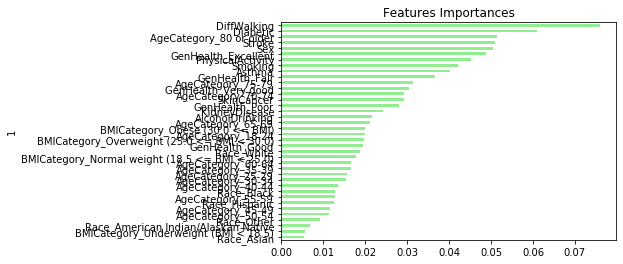

In [28]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
k = 5

In [ ]:
Kf = KFold(n_splits=k, shuffle=True, random_state=78)
scores = cross_val_score(rf_model, X, y, cv=Kf, scoring="accuracy")

In [ ]:
print("Cross-Validation Accuracy: {:.2f}".format(scores.mean()))
print("Cross-Validation Precision: {:.2f}".format(scores.mean()))
print("Cross-Validation Recall: {:.2f}".format(scores.mean()))
print("Cross-Validation F1 Score: {:.2f}".format(scores.mean()))